In [1]:
# This notebook searches the AKA database 
# 1) the total amount of funding a researcher has received during from AKA
# 2) the list of researchers who have received funding for a specific research field
# 3) the number of Google citations for a list of researchers
# 
# Octavian Andrei, 2020

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# template report
AKA_REPORT = {
    'ekaLataus': 0,
    'IBIF_ex' : 'x_RahPaatYht_report2',
    'UILANG': 'en',
    'SANAHAKU': '',
    'ETUNIMI': '',
    'SUKUNIMI': '',
    'SUKUPUOLI': 'FOC_NONE',
    'HAKU': 'FOC_NONE',
    'ORGANIS': 'FOC_NONE',
    'TUTKDI': 'FOC_NONE',
    'TMK': '',
    'PAATVUOSI_A': 2001,
    'PAATVUOSI_L': 2020,
    'LAJITTELU': 'PAATOS',
    'TULOSTE': 'HTML',
}

# customized functions
def get_html(kwargs):
    # base url
    url = 'https://akareport.aka.fi/ibi_apps/WFServlet?'
    # add the query
    url += '&'.join(['{}={}'.format(k,v) for k,v in kwargs.items()])
    
    return url

def get_funding_info(kwargs):
    # fetch the report
    url = get_html(kwargs)
    
    # data frame with the funding decisions
    try:
        data = pd.read_html(url, encoding='utf-8')[0]
        data = data.dropna(axis=0, how='all').reset_index(drop=True)  
    except:
        import requests
        r = requests.get(url)
        fout = 'tmp'
        open(fout, 'wb').write(r.content)
        if d['TULOSTE'] == 'HTML':
            data = pd.read_html(fout)[0]
            data = data.dropna(axis=0, how='all').reset_index(drop=True)
        elif d['TULOSTE'] == 'EXL07':
            data = pd.read_excel(fout)
        else:
            pass
        import os
        os.remove(fout)
    
    return url, data


# Total amount of funding by researcher

In [4]:
researchers = (
    ('Antti', 'Ylä-Jääski'),
    ('Markus', 'Kirjonen'),
    ('Samuel', 'Kaski'),
    ('Tapio', 'Takala'),
    ('Alexander', 'Jung'),
    ('Kaisa', 'Nyberg'),
)

for researcher in researchers:
    etunimi, sukunimi = researcher
    
    d = dict(AKA_REPORT)
    d['ETUNIMI'] = etunimi
    d['SUKUNIMI'] = sukunimi
    
    html, data = get_funding_info(d)
    print(html)
    
    mask = data[0].str.contains('Project funding:')
    if data[mask].empty:
        funding = None
    else:
        funding = data[mask][1].values[0]
    print(etunimi, sukunimi, funding)
    print('='*10)
    print()
    

https://akareport.aka.fi/ibi_apps/WFServlet?ekaLataus=0&IBIF_ex=x_RahPaatYht_report2&UILANG=en&SANAHAKU=&ETUNIMI=Antti&SUKUNIMI=Ylä-Jääski&SUKUPUOLI=FOC_NONE&HAKU=FOC_NONE&ORGANIS=FOC_NONE&TUTKDI=FOC_NONE&TMK=&PAATVUOSI_A=2001&PAATVUOSI_L=2020&LAJITTELU=PAATOS&TULOSTE=HTML
Antti Ylä-Jääski 857 340 €

https://akareport.aka.fi/ibi_apps/WFServlet?ekaLataus=0&IBIF_ex=x_RahPaatYht_report2&UILANG=en&SANAHAKU=&ETUNIMI=Markus&SUKUNIMI=Kirjonen&SUKUPUOLI=FOC_NONE&HAKU=FOC_NONE&ORGANIS=FOC_NONE&TUTKDI=FOC_NONE&TMK=&PAATVUOSI_A=2001&PAATVUOSI_L=2020&LAJITTELU=PAATOS&TULOSTE=HTML
Markus Kirjonen None

https://akareport.aka.fi/ibi_apps/WFServlet?ekaLataus=0&IBIF_ex=x_RahPaatYht_report2&UILANG=en&SANAHAKU=&ETUNIMI=Samuel&SUKUNIMI=Kaski&SUKUPUOLI=FOC_NONE&HAKU=FOC_NONE&ORGANIS=FOC_NONE&TUTKDI=FOC_NONE&TMK=&PAATVUOSI_A=2001&PAATVUOSI_L=2020&LAJITTELU=PAATOS&TULOSTE=HTML
Samuel Kaski 8 901 901 €

https://akareport.aka.fi/ibi_apps/WFServlet?ekaLataus=0&IBIF_ex=x_RahPaatYht_report2&UILANG=en&SANAHAKU=&ET

# List of researchers by the research field

In [5]:
# research field
tutkdi = 1170

d = dict(AKA_REPORT)
d['TULOSTE'] = 'EXL07'
d['TUTKDI'] = tutkdi

html, data = get_funding_info(d)

In [6]:
# index where the list starts
idx = data[data.iloc[:,0] == 'Call'].index[0]
idx

6

In [7]:
# summary data
header = data.iloc[:idx].iloc[1:5].dropna(axis=1, how='all')
header.columns = ['index', 'value']
header

,index,value
1,Year of decision:,2001-2020
2,Research field:,Computer science
3,Project count:,951
4,Project funding:,162 803 415 €


In [8]:
# report data
df = data.iloc[idx+1:].copy()
cols = [
    'CALL',
    'APPLICANT',
    'ORGANISATION',
    'PROJECT_TITLE',
    'DECISION_NUM',
    'DECISION_DATE',
    'FUNDING_PERIOD',
    'FUNDING',
]
df.columns = cols
df['ORGANISATION'] = df['ORGANISATION'].fillna('UNKNOWN')
df.head()

,CALL,APPLICANT,ORGANISATION,PROJECT_TITLE,DECISION_NUM,DECISION_DATE,FUNDING_PERIOD,FUNDING
7,Academy Project funding for early-career resea...,"Järvisalo, Matti J",University of Helsinki,Declarative Boolean Optimization: Pushing the ...,322869,2019-06-11 00:00:00,01.09.2019 - 31.08.2023,600000
8,Academy Project funding for early-career resea...,"Rahtu, Esa",Tampere University,Shallow models meet deep vision / Consortium: ...,324346,2019-06-11 00:00:00,01.09.2019 - 31.08.2023,399667
9,Academy Project funding for early-career resea...,"Salmela, Leena",University of Helsinki,Flavours of de Bruijn graphs: from theory to p...,323233,2019-06-11 00:00:00,01.09.2019 - 31.08.2023,484112
10,Academy Project funding for early-career resea...,"Solin, Arno",Aalto University,Shallow models meet deep vision / Consortium: ...,324345,2019-06-11 00:00:00,01.09.2019 - 31.08.2023,398712
11,Academy Project funding LT,"Ginter, Filip",University of Turku,Universal Dependency Parser,297157,2016-06-10 00:00:00,01.09.2016 - 31.08.2020,345246


In [9]:
# How much funding?
df.FUNDING.sum(), header.set_index('index').iloc[-1].values[0]

(162803415, '162 803 415 €')

In [10]:
# How many projects?
print(df.shape[0])

951


In [11]:
# How many projects / organisation?
x = df.ORGANISATION.value_counts()
# print(x.sum(), df.ORGANISATION.shape[0])
print('Organizations: ', x.shape[0])


Organizations:  61


In [12]:
# How many researchers?
x = df.APPLICANT.value_counts()
# print(x.sum(), df.APPLICANT.shape[0])
print('Researchers: ', x.shape[0])

Researchers:  424


In [13]:
# list of researchers
researchers = df.groupby('APPLICANT').apply(lambda x: x.FUNDING.sum())
researchers.name = 'FUNDING'

# Top 10
researchers = researchers.sort_values(ascending=False)
researchers[:10]

APPLICANT
Oja, Erkki           4721187
Kaski, Kimmo         4571000
Mäkelä, Kristiina    4130000
Väänänen, Jouko      3311000
Ukkonen, Esko J      2848000
Back, Ralph-Johan    2575996
Kaski, Samuel        2491615
Tarkoma, Sasu        2415906
Zhao, Guoying        2396892
Mannila, Heikki      2186830
Name: FUNDING, dtype: int64

# Google citations

In [14]:
from scholarly import scholarly

def get_google_citations(researchers):
    # container to hold citations
    citeby = np.array([np.nan] * researchers.shape[0])
    
    # loop over the series
    for i, name in enumerate(researchers):
        author = name.split(',')[::-1]
        author = ' '.join(author).strip()
        # citations are unknown
        citations = citeby[i]
        try:
            # search for this author
            data = next(scholarly.search_author(author))

            # if indeed this author, update citations
            if data.name == author: 
                citations = data.citedby
                
            else:
                continue
        except:
            continue

        # update list
        citeby[i] = citations
        
    return citeby


In [15]:
# number of citations on google scholar
import time
t0 = time.time()
citeby = get_google_citations(researchers.index.values[:50])
t = time.time()
print(t-t0)

179.44699382781982


In [16]:
# How many researchers with citations?
pd.Series(citeby).dropna().shape[0], len(citeby)

(31, 50)

In [17]:
B = researchers.reset_index()
B['CITEBY'] = pd.Series(citeby)
B

,APPLICANT,FUNDING,CITEBY
0,"Oja, Erkki",4721187,62647.0
1,"Kaski, Kimmo",4571000,18521.0
2,"Mäkelä, Kristiina",4130000,3067.0
3,"Väänänen, Jouko",3311000,2813.0
4,"Ukkonen, Esko J",2848000,NaN
...,...,...,...
419,"Burmakin, Eugene",690,NaN
420,"Stepien, Robert",650,NaN
421,"Kangas, Kalle",540,NaN
422,"Talvitie, Topi",0,NaN


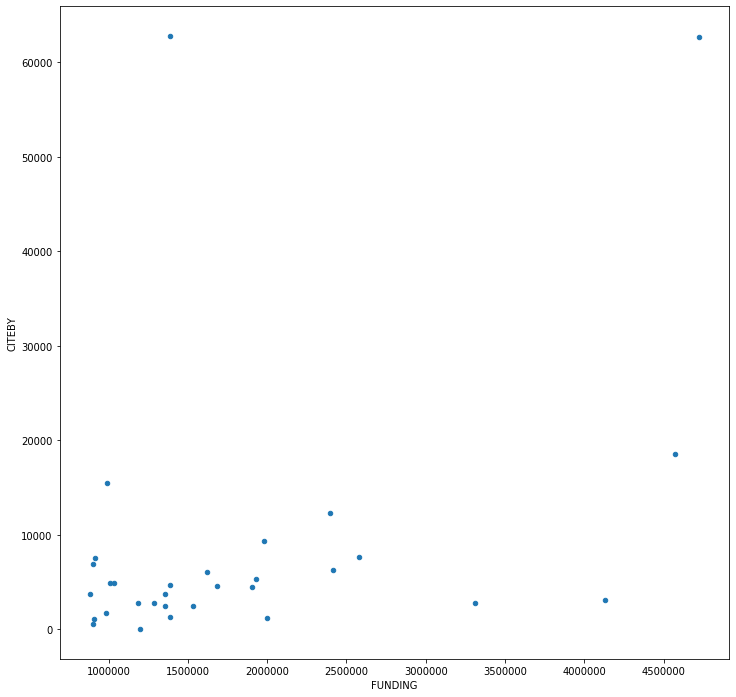

In [18]:
# the scatter plot
fig, ax = plt.subplots(figsize=(12,12))
B.plot(ax=ax, kind='scatter', x='FUNDING', y='CITEBY')